In [1]:
import torch
import scvi
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import scipy

Global seed set to 0


In [2]:
def max_min_scale(dataset):
    if np.max(dataset) - np.min(dataset) != 0:
        return (dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))
    if np.max(dataset) - np.min(dataset) == 0:
        return dataset

In [3]:
def best_result_selection(dataset, method):

    if method == "adver":
        if dataset == "all":
            pd_csv = pd.read_csv("grid_adver_train_all.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best

        if dataset == "lung":
            pd_csv = pd.read_csv("grid_adver_train_lung.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best

        if dataset == "pancreas":
            pd_csv = pd.read_csv("grid_adver_train_pancreas.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best
    
    if method == "general_scvi":
        if dataset == "all":
            pd_csv = pd.read_csv("grid_general_scvi_all.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best

        if dataset == "lung":
            pd_csv = pd.read_csv("grid_general_scvi_lung.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best

        if dataset == "pancreas":
            pd_csv = pd.read_csv("grid_general_scvi_pancreas.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best


    if method == "No_adver":
        if dataset == "all":
            pd_csv = pd.read_csv("grid_NO_adver_train_all.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best

        if dataset == "lung":
            pd_csv = pd.read_csv("grid_NO_adver_train_lung.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best

        if dataset == "pancreas":
            pd_csv = pd.read_csv("grid_No_adver_train_pancreas.csv")
            pd_best = pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[:, pd_csv.loc[:,'VAE layers of 1, num latents of 5, lr of 0.001':'VAE layers of 3, num latents of 15, lr of 0.0001'].iloc[6].argmax()]
            return pd_best

In [4]:
all_adver_best = best_result_selection("all", "adver")
lung_adver_best = best_result_selection("lung", "adver")
pancreas_adver_best = best_result_selection("pancreas", "adver")
all_general_scvi_best = best_result_selection("all", "general_scvi")
lung_general_scvi_best = best_result_selection("lung", "general_scvi")
pancreas_general_scvi_best = best_result_selection("pancreas", "general_scvi")
all_No_adver_best = best_result_selection("all", "No_adver")
lung_No_adver_best = best_result_selection("lung", "No_adver")
pancreas_No_adver_best = best_result_selection("pancreas", "No_adver")

In [5]:
def convert_scorelist_into_df(scorelist, variable_name, store, csv_file_name):
    score_pd = pd.DataFrame(scorelist, index = ["ari", "asw_cell", "kbet", "asw_batch","bio_score", "batch_score", "overall_score"], columns = variable_name)
    if store:
        score_pd.to_csv(csv_file_name)
    return score_pd

In [6]:
def compare_method(all_adver_best, all_general_scvi_best, all_No_adver_best, lung_adver_best, lung_general_scvi_best, lung_No_adver_best,
pancreas_adver_best, pancreas_general_scvi_best, pancreas_No_adver_best, variable_name, store, csv_file_name):

    all_adver_best_list = all_adver_best.values.tolist()
    lung_adver_best_list = lung_adver_best.values.tolist()
    pancreas_adver_best_list = pancreas_adver_best.tolist()
    all_general_scvi_best_list = all_general_scvi_best.values.tolist()
    lung_general_scvi_best_list = lung_general_scvi_best.values.tolist()
    pancreas_general_scvi_best_list = pancreas_general_scvi_best.tolist()
    all_No_adver_best_list = all_No_adver_best.values.tolist()
    lung_No_adver_best_list = lung_No_adver_best.values.tolist()
    pancreas_No_adver_best_list = pancreas_No_adver_best.values.tolist()


    ari_collection_mn_all = max_min_scale([all_adver_best_list[0], all_general_scvi_best_list[0],  all_No_adver_best_list[0]])
    
    ari_collection_mn_lung = max_min_scale([lung_adver_best_list[0], lung_general_scvi_best_list[0], lung_No_adver_best_list[0]])

    ari_collection_mn_pancreas = max_min_scale([pancreas_adver_best_list[0], pancreas_general_scvi_best_list[0], pancreas_No_adver_best_list[0]])

    asw_cell_collection_mn_all = max_min_scale([all_adver_best_list[1], all_general_scvi_best_list[1],  all_No_adver_best_list[1]]) 

    asw_cell_collection_mn_lung = max_min_scale([lung_adver_best_list[1], lung_general_scvi_best_list[1], lung_No_adver_best_list[1]]) 

    asw_cell_collection_mn_pancreas = max_min_scale([pancreas_adver_best_list[1], pancreas_general_scvi_best_list[1], pancreas_No_adver_best_list[1]])

    kbet_collection_mn_all = max_min_scale([all_adver_best_list[2], all_general_scvi_best_list[2],  all_No_adver_best_list[2]]) 

    kbet_collection_mn_lung = max_min_scale([lung_adver_best_list[2], lung_general_scvi_best_list[2], lung_No_adver_best_list[2]])

    kbet_collection_mn_pancreas = max_min_scale([pancreas_adver_best_list[2], pancreas_general_scvi_best_list[2], pancreas_No_adver_best_list[2]])

    asw_batch_collection_mn_all = max_min_scale([all_adver_best_list[3], all_general_scvi_best_list[3],  all_No_adver_best_list[3]])

    asw_batch_collection_mn_lung = max_min_scale([lung_adver_best_list[3], lung_general_scvi_best_list[3], lung_No_adver_best_list[3]])

    asw_batch_collection_mn_pancreas = max_min_scale([pancreas_adver_best_list[3], pancreas_general_scvi_best_list[3], pancreas_No_adver_best_list[3]])



    bio_score_collection_all = [] 
    batch_score_collection_all = [] 
    overall_score_collection_all = []

    bio_score_collection_lung = [] 
    batch_score_collection_lung = [] 
    overall_score_collection_lung = []

    bio_score_collection_pancreas = [] 
    batch_score_collection_pancreas = [] 
    overall_score_collection_pancreas = []

    for i in range(3):
        bio_score = np.mean((ari_collection_mn_all[i], asw_cell_collection_mn_all[i]))
        bio_score_collection_all.append(bio_score)
        batch_score = np.mean((kbet_collection_mn_all[i], asw_batch_collection_mn_all[i]))
        batch_score_collection_all.append(batch_score)
        overall_score_collection_all.append(0.6 * bio_score + 0.4 * batch_score)
    
    for i in range(3):
        bio_score = np.mean((ari_collection_mn_lung[i], asw_cell_collection_mn_lung[i]))
        bio_score_collection_lung .append(bio_score)
        batch_score = np.mean((kbet_collection_mn_lung[i], asw_batch_collection_mn_lung[i]))
        batch_score_collection_lung .append(batch_score)
        overall_score_collection_lung .append(0.6 * bio_score + 0.4 * batch_score)

    for i in range(3):
        bio_score = np.mean((ari_collection_mn_pancreas[i], asw_cell_collection_mn_pancreas[i]))
        bio_score_collection_pancreas.append(bio_score)
        batch_score = np.mean((kbet_collection_mn_pancreas[i], asw_batch_collection_mn_pancreas[i]))
        batch_score_collection_pancreas.append(batch_score)
        overall_score_collection_pancreas.append(0.6 * bio_score + 0.4 * batch_score)

    
    bio_score_collection = bio_score_collection_all + bio_score_collection_lung + bio_score_collection_pancreas
    batch_score_collection = batch_score_collection_all + batch_score_collection_lung + batch_score_collection_pancreas
    overall_score_collection = overall_score_collection_all + overall_score_collection_lung + overall_score_collection_pancreas


    score_list = [[all_adver_best_list[0], all_general_scvi_best_list[0],  all_No_adver_best_list[0], 
    lung_adver_best_list[0], lung_general_scvi_best_list[0], lung_No_adver_best_list[0], 
    pancreas_adver_best_list[0], pancreas_general_scvi_best_list[0], pancreas_No_adver_best_list[0]], 


    [all_adver_best_list[1], all_general_scvi_best_list[1],  all_No_adver_best_list[1], 
    lung_adver_best_list[1], lung_general_scvi_best_list[1], lung_No_adver_best_list[1], 
    pancreas_adver_best_list[1], pancreas_general_scvi_best_list[1], pancreas_No_adver_best_list[1]],

    [all_adver_best_list[2], all_general_scvi_best_list[2],  all_No_adver_best_list[2], 
    lung_adver_best_list[2], lung_general_scvi_best_list[2], lung_No_adver_best_list[2], 
    pancreas_adver_best_list[2], pancreas_general_scvi_best_list[2], pancreas_No_adver_best_list[2]],

    [all_adver_best_list[3], all_general_scvi_best_list[3],  all_No_adver_best_list[3], 
    lung_adver_best_list[3], lung_general_scvi_best_list[3], lung_No_adver_best_list[3], 
    pancreas_adver_best_list[3], pancreas_general_scvi_best_list[3], pancreas_No_adver_best_list[3]],
    bio_score_collection, batch_score_collection, overall_score_collection]

    score_pd = convert_scorelist_into_df(score_list, variable_name, store, csv_file_name)

    return score_pd

In [7]:
score_pd = compare_method(all_adver_best, all_general_scvi_best, all_No_adver_best, lung_adver_best, lung_general_scvi_best, lung_No_adver_best,
pancreas_adver_best, pancreas_general_scvi_best, pancreas_No_adver_best, ["adver_all","general_scvi_all", "No_adver_all", "adver_lung","general_scvi_lung","No_adver_lung",
"adver_pancreas","general_scvi_pancreas","No_adver_pancreas"], True, "grid_search_result.csv")

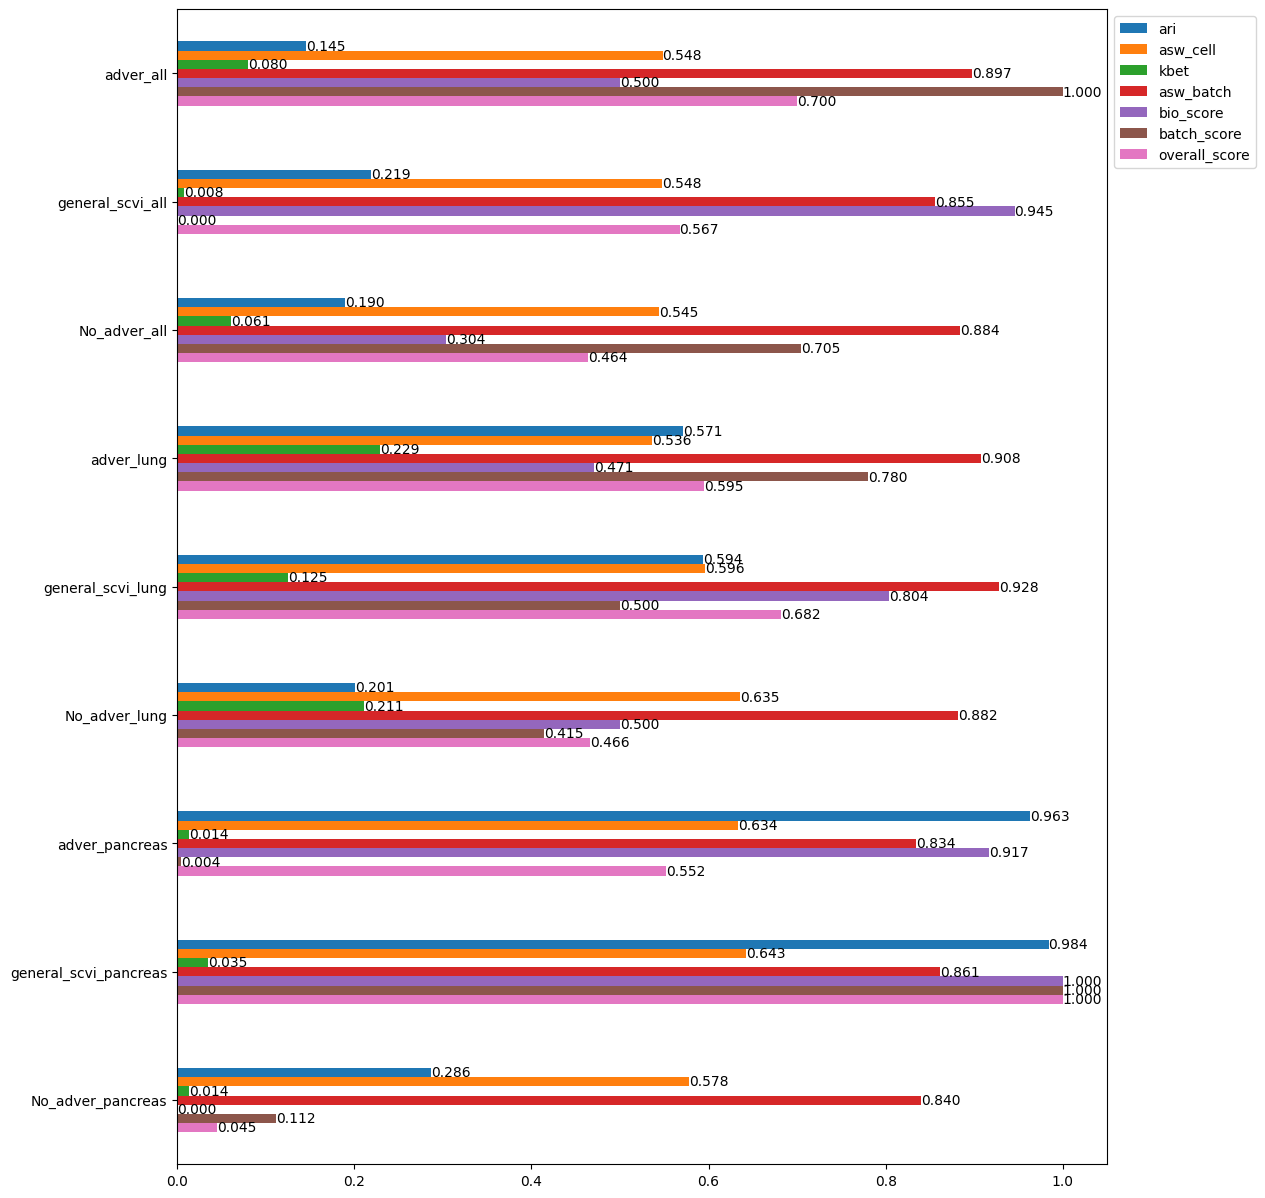

In [9]:
score_pd_T = score_pd.T

ax = score_pd_T.plot.barh(figsize=(12,15))
ax.invert_yaxis() 
ax.legend(bbox_to_anchor=(1, 1))
for container in ax.containers:
    ax.bar_label(container, fmt = '%.3f')

In [10]:
def mean_std(pd, method):
    if method == "adver":
        index = [0, 3, 6]

    elif method == "general_scvi":
        index = [1, 4, 7]

    elif method == "no_adver":
        index = [2, 5, 8]

    pd_bio_mean = np.average([pd.loc["bio_score"][index[0]], pd.loc["bio_score"][index[1]], pd.loc["bio_score"][index[2]]])
    pd_bio_std = np.std([pd.loc["bio_score"][index[0]], pd.loc["bio_score"][index[1]], pd.loc["bio_score"][index[2]]])
    pd_batch_mean = np.average([pd.loc["batch_score"][index[0]], pd.loc["batch_score"][index[1]], pd.loc["batch_score"][index[2]]])
    pd_batch_std = np.std([pd.loc["batch_score"][index[0]], pd.loc["batch_score"][index[1]], pd.loc["batch_score"][index[2]]])

    return [pd_bio_mean, pd_bio_std, pd_batch_mean, pd_batch_std]

In [11]:
score_adver = mean_std(score_pd, "adver")
score_general_scvi = mean_std(score_pd, "general_scvi")
score_no_adver = mean_std(score_pd, "no_adver")

In [12]:
import matplotlib.pyplot as plt

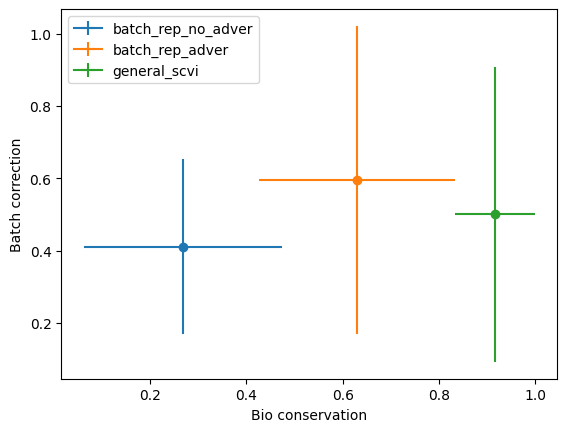

In [13]:
fig, ax = plt.subplots()
ax.scatter(score_no_adver[0], score_no_adver[2])
plt.errorbar(score_no_adver[0], score_no_adver[2], xerr = score_no_adver[1],yerr=score_no_adver[3], label = 'batch_rep_no_adver')

ax.scatter(score_adver[0], score_adver[2])
plt.errorbar(score_adver[0], score_adver[2], xerr = score_adver[1],yerr=score_adver[3], label = 'batch_rep_adver')

ax.scatter(score_general_scvi[0], score_general_scvi[2])
plt.errorbar(score_general_scvi[0], score_general_scvi[2], xerr = score_general_scvi[1],yerr=score_general_scvi[3], label = 'general_scvi')
plt.legend(loc='upper left')
plt.xlabel('Bio conservation')
plt.ylabel('Batch correction')
plt.show()

In [16]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), bbox_to_anchor=(1.17, 1))

In [17]:
def hetero_plot(total_csv, batch_0_csv, batch_1_csv, batch_2_csv, batch_3_csv, dataset, method, title):
    if dataset == 'all' and method == 'general_scvi':
        right_axis_distance = 1.1
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 25
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 25
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 25
        asw_batch_error_position = asw_batch_number_position + 28
        
    if dataset == 'lung' and method == 'general_scvi':
        right_axis_distance = 1.1
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 30
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 50
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 25
        asw_batch_error_position = asw_batch_number_position + 28


    if dataset == 'pancreas' and method == 'general_scvi':
        right_axis_distance = 1.4
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 25
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 25
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 25
        asw_batch_error_position = asw_batch_number_position + 28


    if dataset == 'all' and method == 'adver':
        right_axis_distance = 1.1
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 15
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 15
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 15
        asw_batch_error_position = asw_batch_number_position + 28


    if dataset == 'lung' and method == 'adver':
        right_axis_distance = 1.1
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 50
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 85
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 30
        asw_batch_error_position = asw_batch_number_position + 28


    if dataset == 'pancreas' and method == 'adver':
        right_axis_distance = 1.1
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 15
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 40
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 15
        asw_batch_error_position = asw_batch_number_position + 28


    if dataset == 'all' and method == 'no_adver':
        right_axis_distance = 1.1
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 25
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 55
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 25
        asw_batch_error_position = asw_batch_number_position + 28


    if dataset == 'lung' and method == 'no_adver':
        right_axis_distance = 1.1
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 30
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 40
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 25
        asw_batch_error_position = asw_batch_number_position + 28

    if dataset == 'pancreas' and method == 'no_adver':
        right_axis_distance = 1.1
        ari_number_position = 15
        ari_error_position = ari_number_position + 28
        asw_cell_number_position = 25
        asw_cell_error_position = asw_cell_number_position + 28
        kbet_number_position = 40
        kbet_error_position = kbet_number_position + 28
        asw_batch_number_position = 25
        asw_batch_error_position = asw_batch_number_position + 28


    pd_csv_0 = pd.read_csv(batch_0_csv)
    pd_csv_1 = pd.read_csv(batch_1_csv)
    pd_csv_2 = pd.read_csv(batch_2_csv)
    pd_csv_3 = pd.read_csv(batch_3_csv)
    pd_csv = pd.read_csv(total_csv)
    
    pd_csv.set_index("Unnamed: 0", inplace = True)
    pd_csv_T = pd_csv.T
    pd_csv_T.columns.name = None

    std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)
    std_pd.index = ['0_batches_removed', '1_batches_removed', '2_batches_removed', '3_batches_removed']
    std_pd.columns = ['ari_std', 'asw_cell_std', 'kbet_std', 'asw_batch_std']


    fig, ax = plt.subplots()

    ari_error = std_pd.ari_std.to_frame('ari')
    asw_cell_error = std_pd.asw_cell_std.to_frame('asw_cell')
    kbet_error = std_pd.kbet_std.to_frame('kbet')
    asw_batch_error = std_pd.asw_batch_std.to_frame('asw_batch')


    ari_plot = pd_csv_T.plot.barh(figsize=(12,10), xerr = ari_error, ax = ax)
    asw_cell_plot = pd_csv_T.plot.barh(figsize=(12,10), xerr = asw_cell_error, ax = ax)
    kbet_plot = pd_csv_T.plot.barh(figsize=(12,10), xerr = kbet_error, ax = ax)
    asw_batch_plot = pd_csv_T.plot.barh(figsize=(12,10), xerr = asw_batch_error, ax = ax)


    ax.set_title(title)
    ax.invert_yaxis()
    legend_without_duplicate_labels(ax)
    ax.set_xlim(right=right_axis_distance)

    for bars in ax.containers[1:2]:
        ax.bar_label(bars, padding=ari_number_position, labels=[f'{x:,.3f}' for x in bars.datavalues])
        ax.bar_label(bars, padding=ari_error_position, labels=['±%.3f' % e for e in ari_error.values])

    for bars in ax.containers[2:3]:
        ax.bar_label(bars, padding=asw_cell_number_position, labels=[f'{x:,.3f}' for x in bars.datavalues])
        ax.bar_label(bars, padding=asw_cell_error_position, labels=['±%.3f' % e for e in asw_cell_error.values])

    for bars in ax.containers[3:4]:
        ax.bar_label(bars, padding=kbet_number_position, labels=[f'{x:,.3f}' for x in bars.datavalues])
        ax.bar_label(bars, padding=kbet_error_position, labels=['±%.3f' % e for e in kbet_error.values])

    for bars in ax.containers[4:5]:
        ax.bar_label(bars, padding=asw_batch_number_position, labels=[f'{x:,.3f}' for x in bars.datavalues])
        ax.bar_label(bars, padding=asw_batch_error_position, labels=['±%.3f' % e for e in asw_batch_error.values])

    for bars in ax.containers[5:8]:
        ax.bar_label(bars, fmt = '%.3f')
    

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


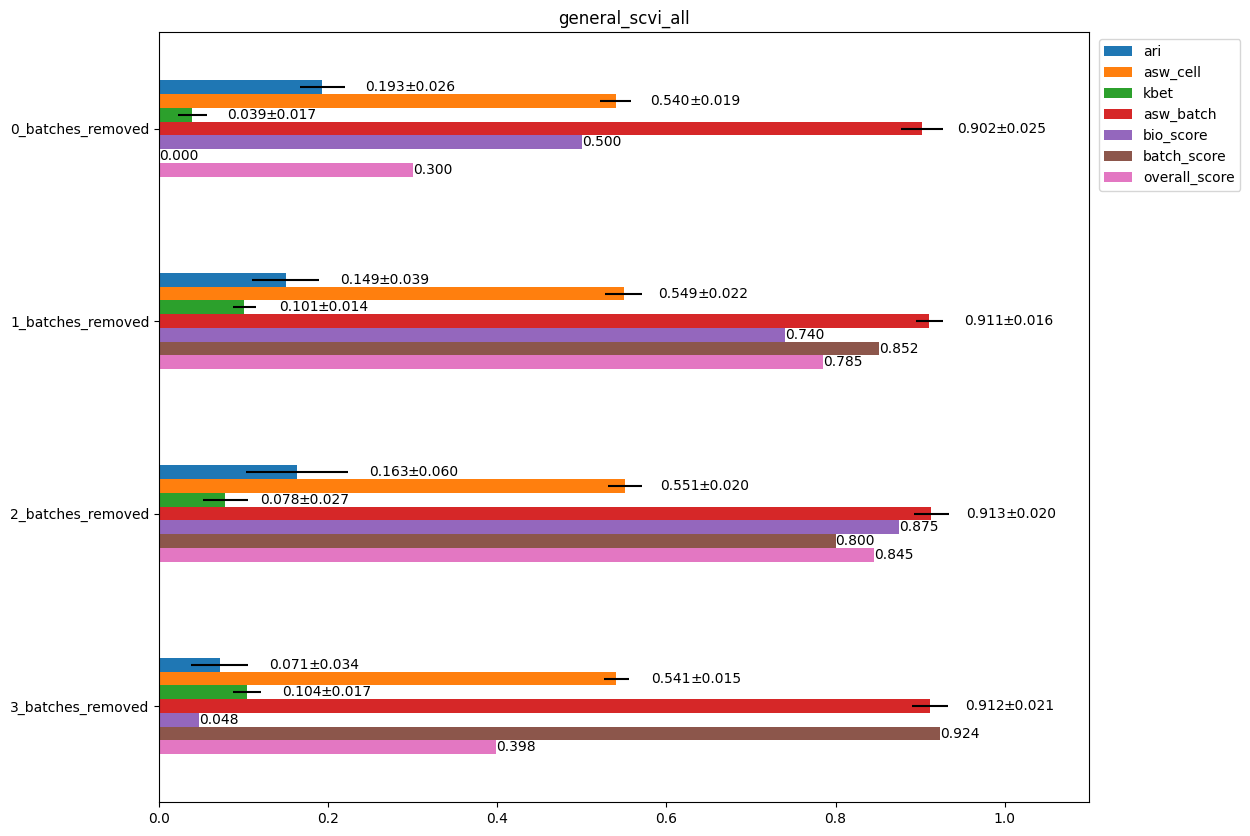

In [18]:
hetero_plot("removed_batches_all_general_scvi.csv", 
"general_scvi_all_batch_0.csv", 
"general_scvi_all_batch_1.csv", 
"general_scvi_all_batch_2.csv", 
"general_scvi_all_batch_3.csv",
dataset = 'all',
method = 'general_scvi',
title = 'general_scvi_all')

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


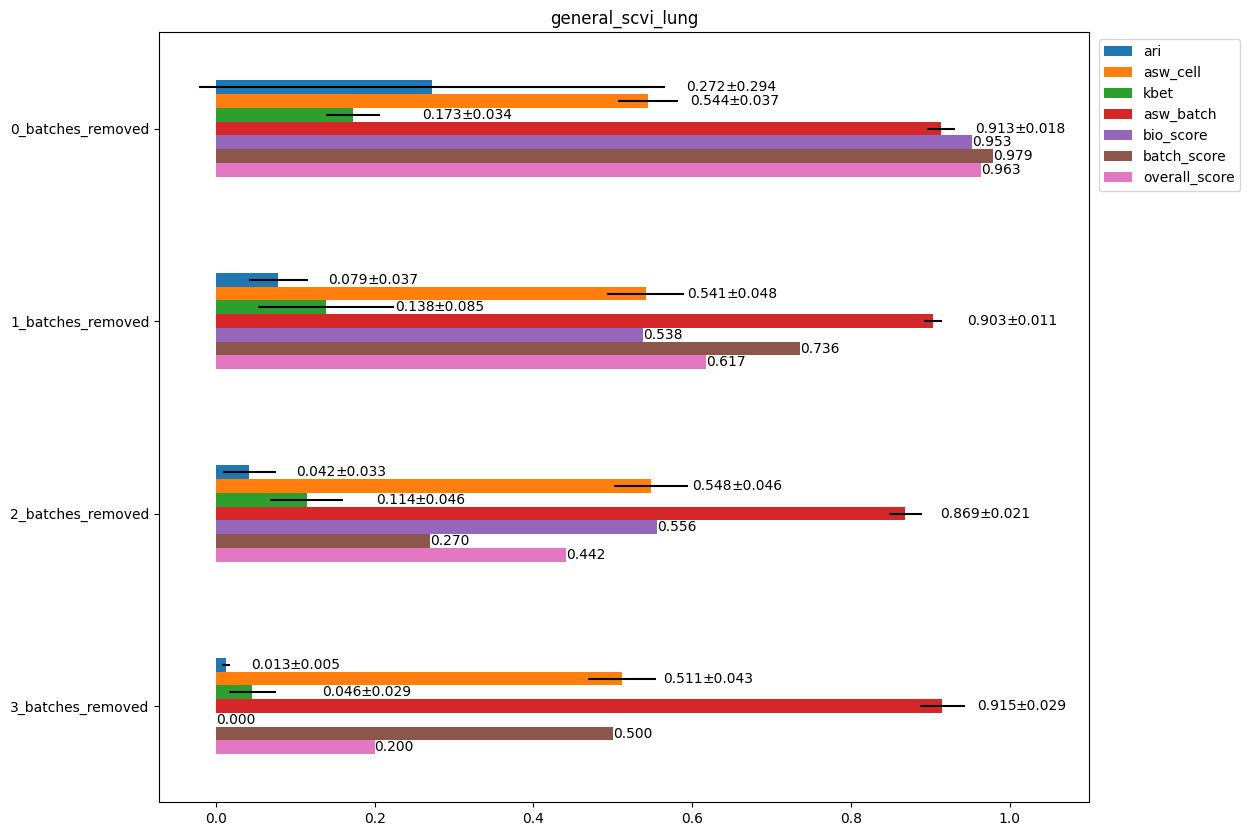

In [19]:
hetero_plot("removed_batches_lung_general_scvi.csv", 
"general_scvi_lung_batch_0.csv", 
"general_scvi_lung_batch_1.csv", 
"general_scvi_lung_batch_2.csv", 
"general_scvi_lung_batch_3.csv",
dataset = 'lung',
method = 'general_scvi',
title = 'general_scvi_lung')

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


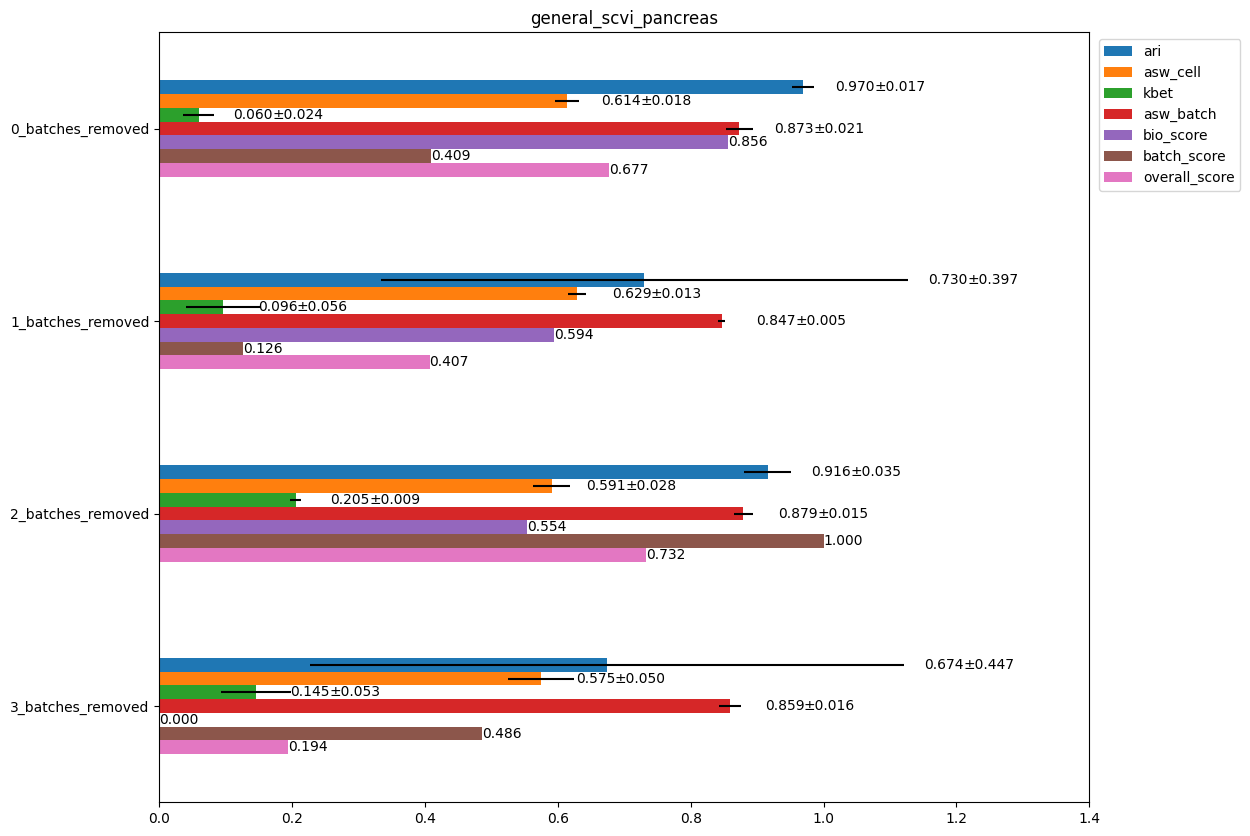

In [20]:
hetero_plot("removed_batches_pancreas_general_scvi.csv", 
"general_scvi_pancreas_batch_0.csv", 
"general_scvi_pancreas_batch_1.csv", 
"general_scvi_pancreas_batch_2.csv", 
"general_scvi_pancreas_batch_3.csv",
dataset = 'pancreas',
method = 'general_scvi',
title = 'general_scvi_pancreas')

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


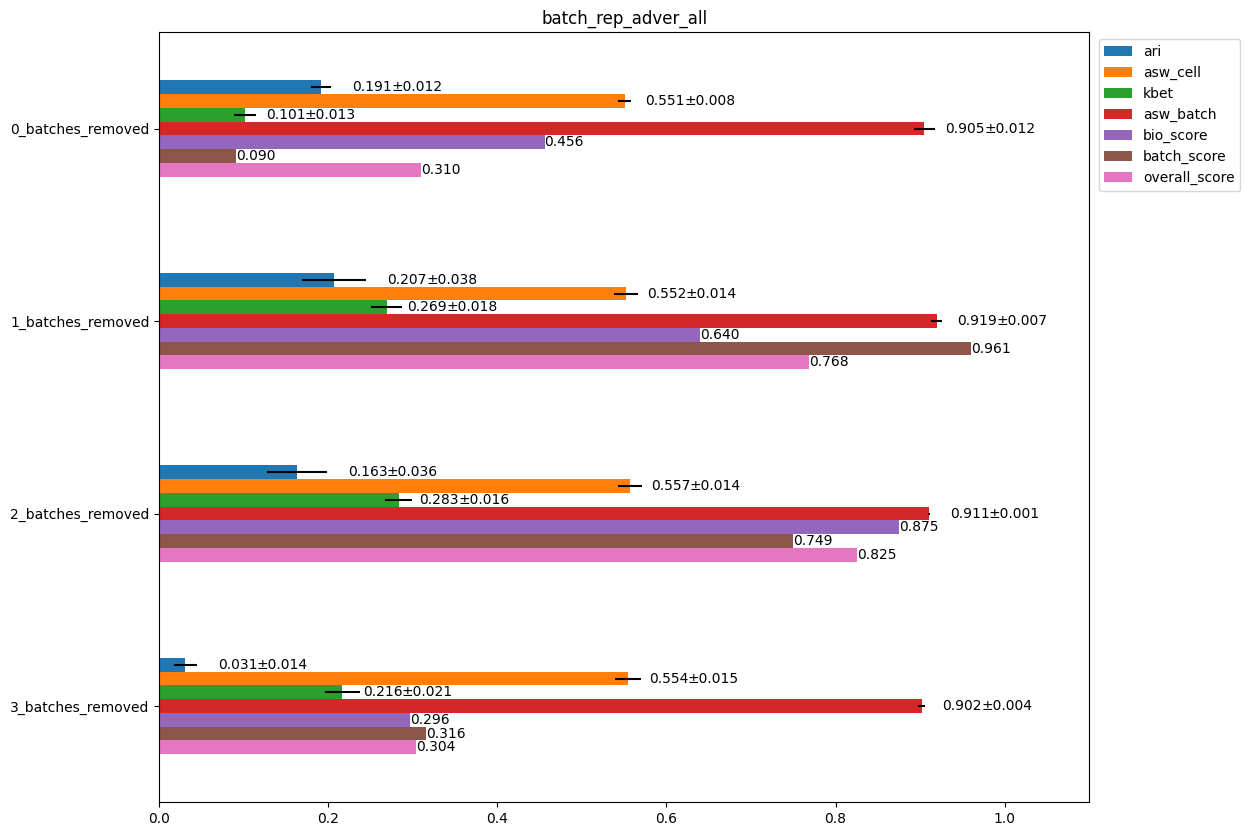

In [21]:
hetero_plot("removed_batches_all_adver.csv", 
"adver_all_batch_0.csv", 
"adver_all_batch_1.csv", 
"adver_all_batch_2.csv", 
"adver_all_batch_3.csv",
dataset = 'all',
method = 'adver',
title = 'batch_rep_adver_all')

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


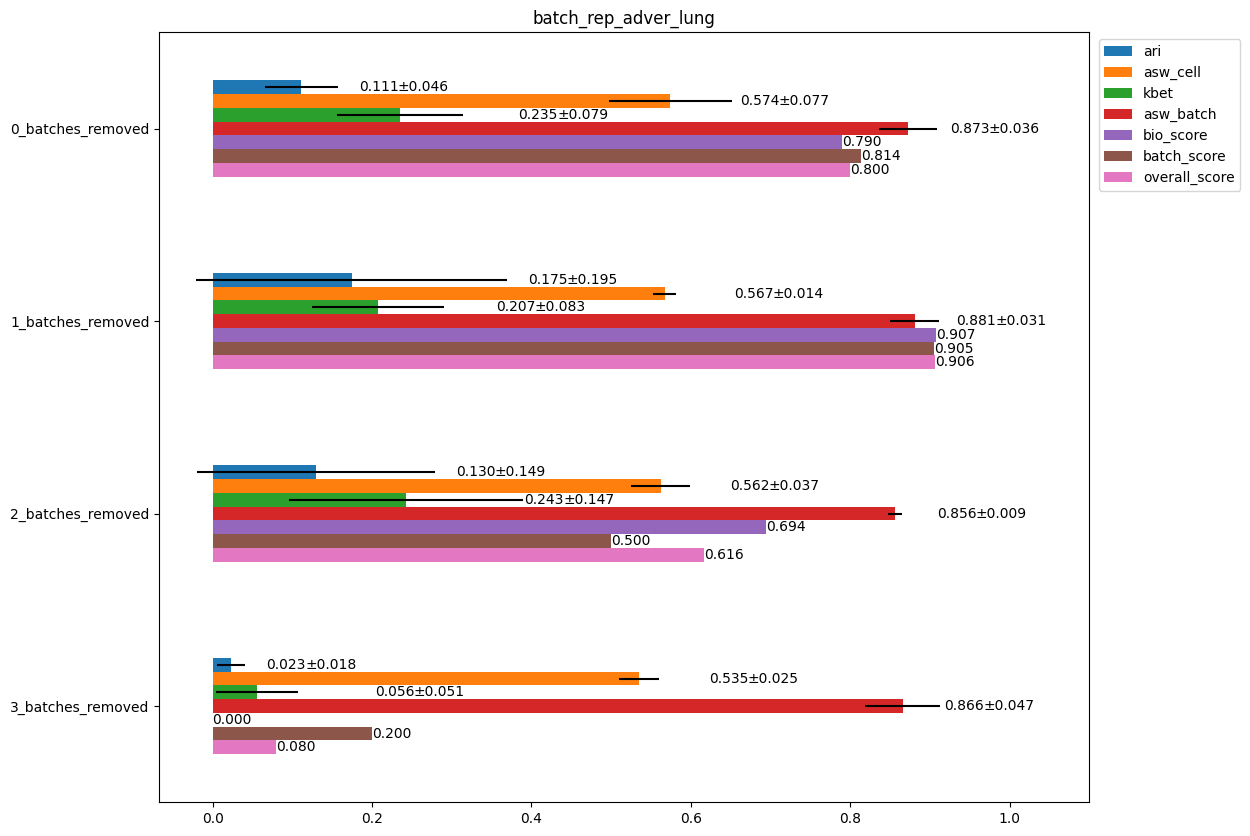

In [22]:
hetero_plot("removed_batches_lung_adver.csv", 
"adver_lung_batch_0.csv", 
"adver_lung_batch_1.csv", 
"adver_lung_batch_2.csv", 
"adver_lung_batch_3.csv",
dataset = 'lung',
method = 'adver',
title = 'batch_rep_adver_lung')

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


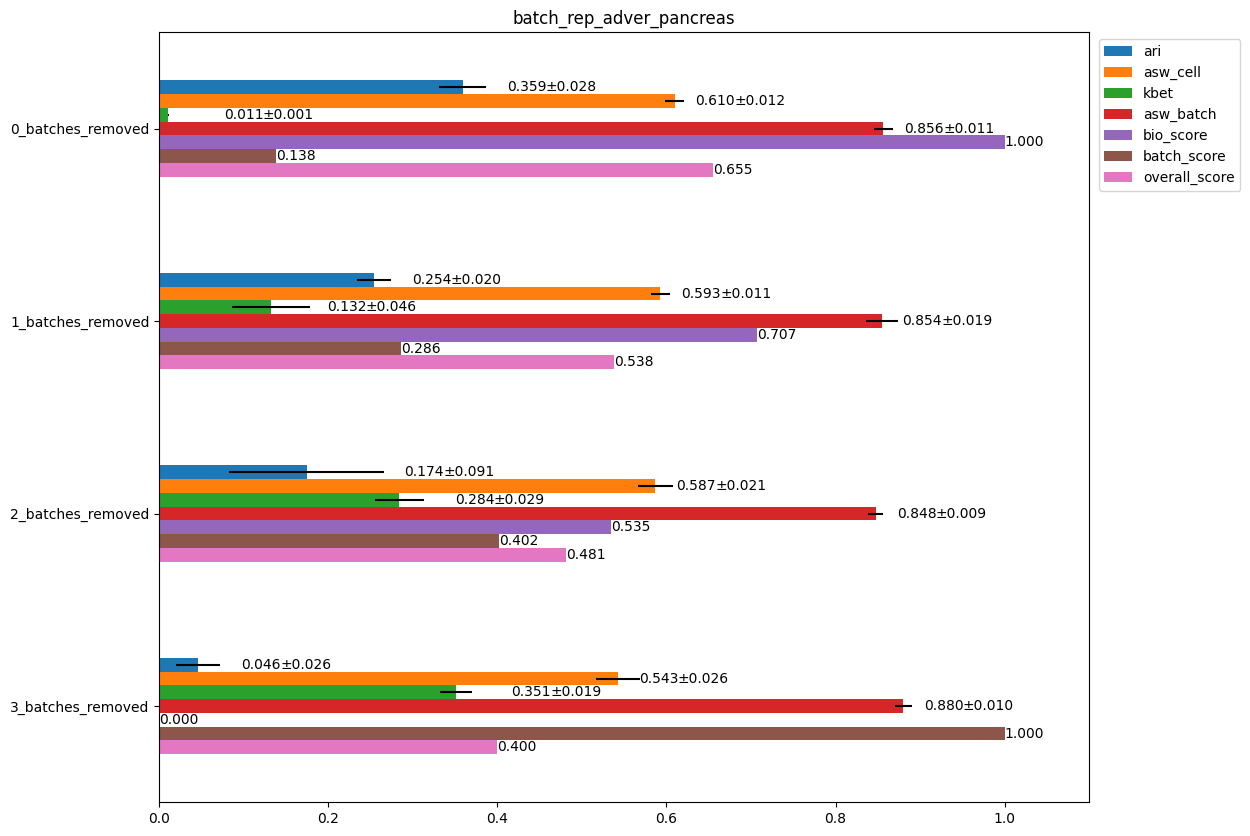

In [23]:
hetero_plot("removed_batches_pancreas_adver.csv", 
"adver_pancreas_batch_0.csv", 
"adver_pancreas_batch_1.csv", 
"adver_pancreas_batch_2.csv", 
"adver_pancreas_batch_3.csv",
dataset = 'pancreas',
method = 'adver',
title = 'batch_rep_adver_pancreas')

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


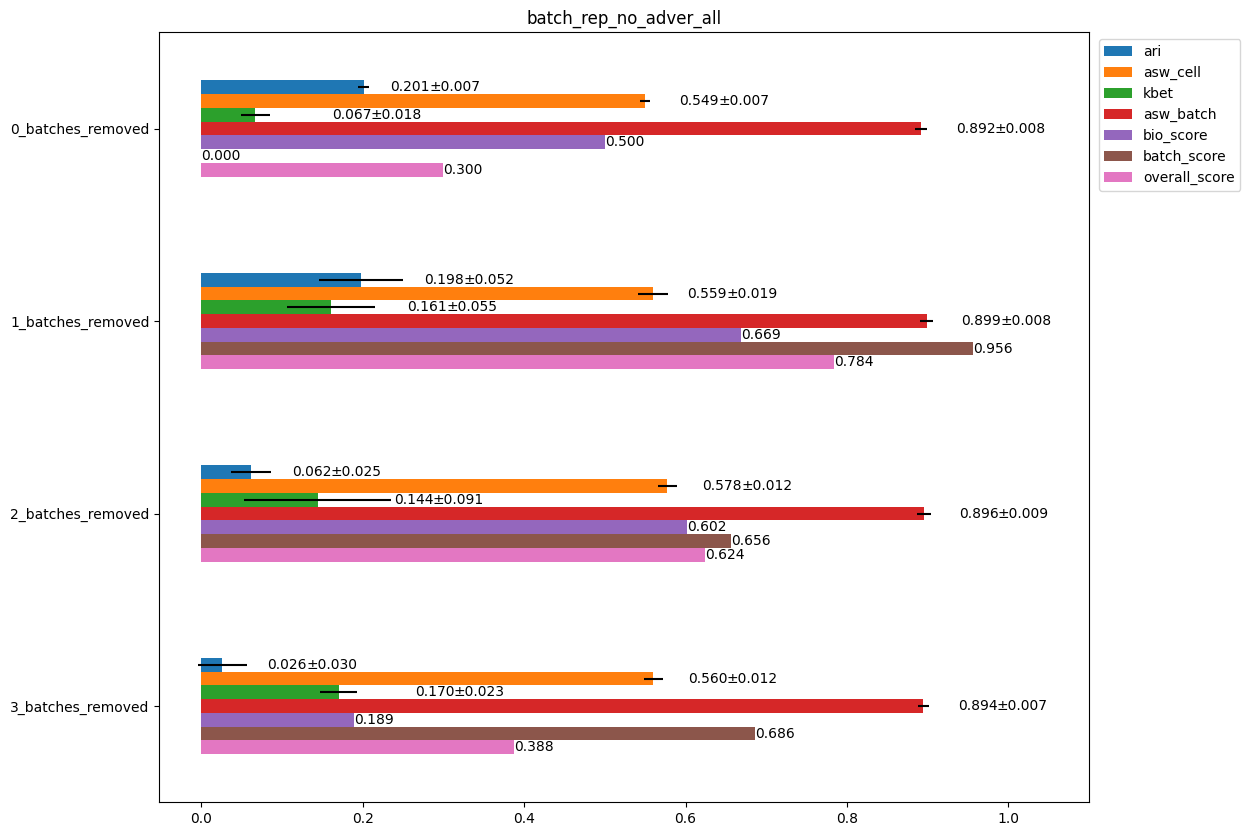

In [24]:
hetero_plot("removed_batches_all_No_adver.csv", 
"No_adver_all_batch_0.csv", 
"No_adver_all_batch_1.csv", 
"No_adver_all_batch_2.csv", 
"No_adver_all_batch_3.csv",
dataset = 'all',
method = 'no_adver',
title = 'batch_rep_no_adver_all')

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


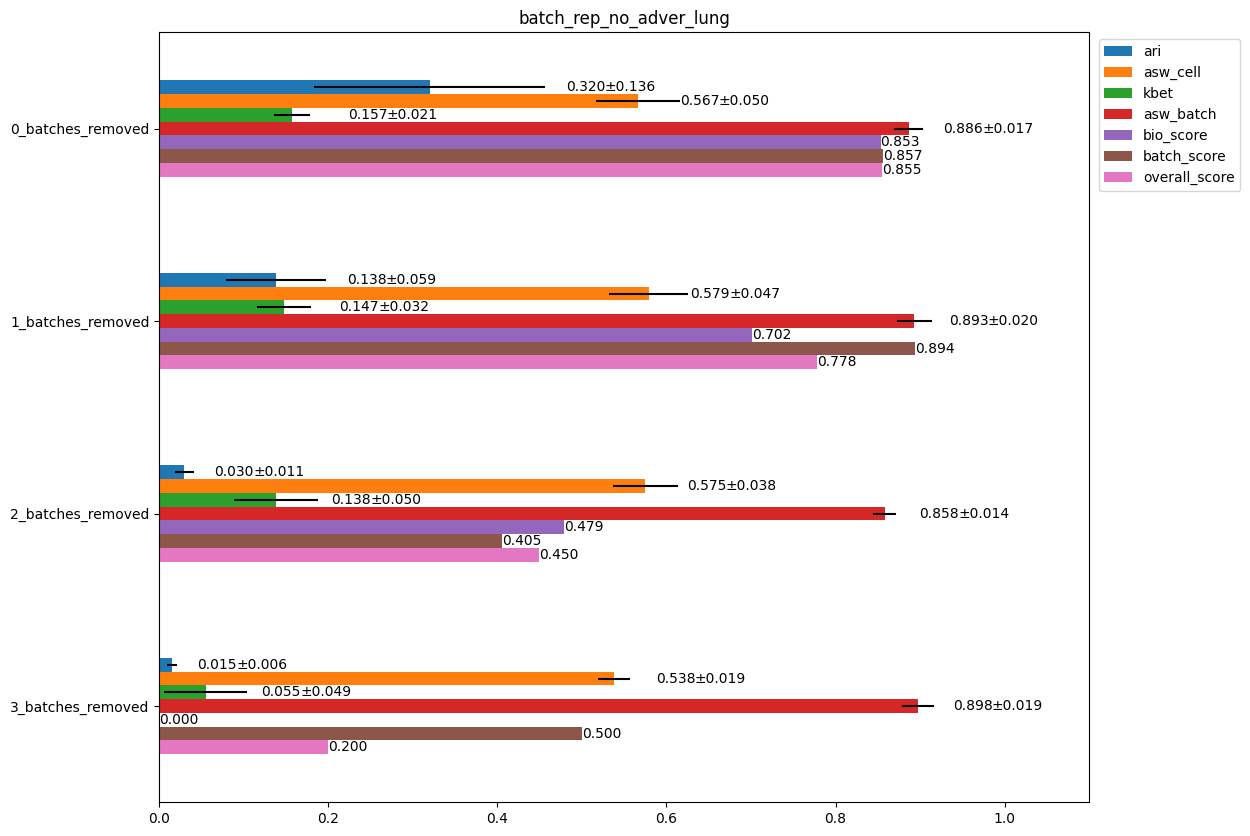

In [25]:
hetero_plot("removed_batches_lung_No_adver.csv", 
"No_adver_lung_batch_0.csv", 
"No_adver_lung_batch_1.csv", 
"No_adver_lung_batch_2.csv", 
"No_adver_lung_batch_3.csv",
dataset = 'lung',
method = 'no_adver',
title = 'batch_rep_no_adver_lung')

C:\Users\41671\AppData\Local\Temp\ipykernel_8068\2114025846.py:118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_pd = pd.DataFrame(data=[pd_csv_0.std(axis = 1), pd_csv_1.std(axis = 1), pd_csv_2.std(axis = 1), pd_csv_3.std(axis = 1)], index = None, columns = None)


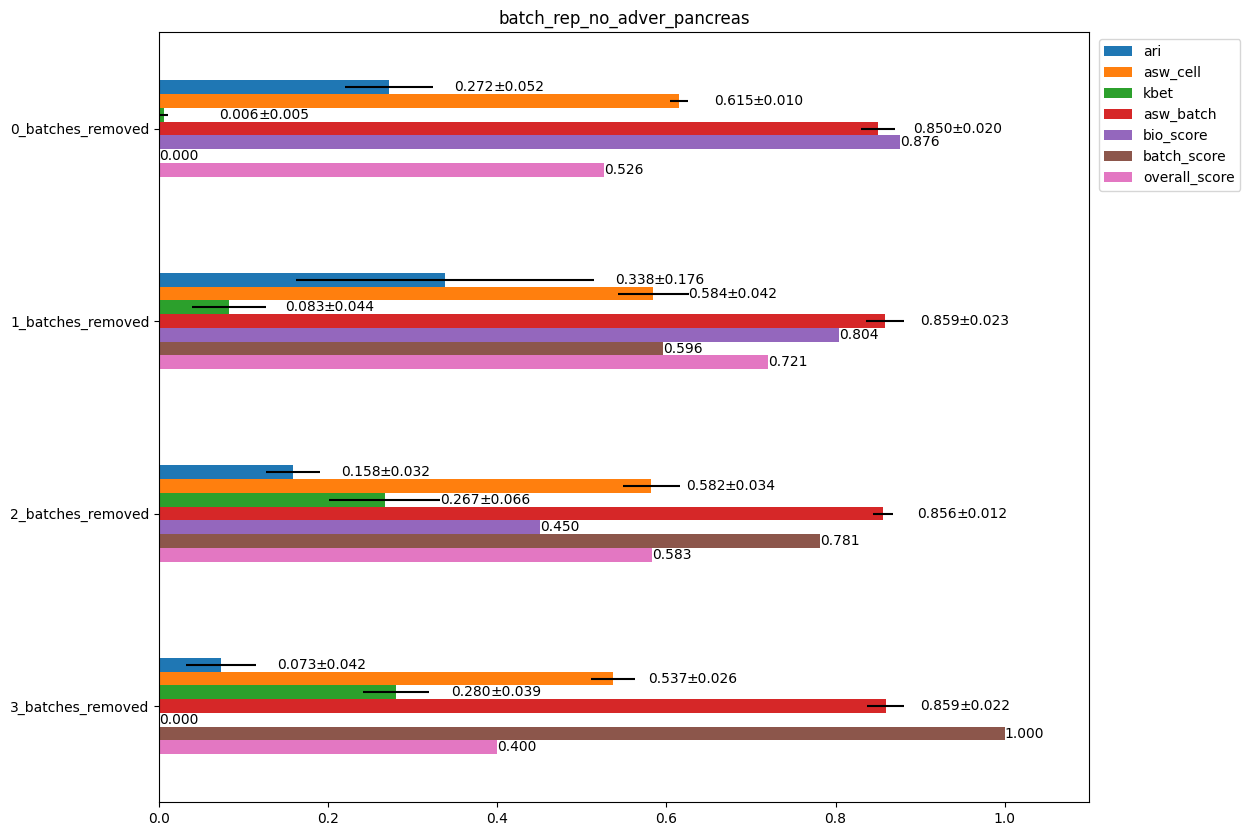

In [26]:
hetero_plot("removed_batches_pancreas_No_adver.csv", 
"No_adver_pancreas_batch_0.csv", 
"No_adver_pancreas_batch_1.csv", 
"No_adver_pancreas_batch_2.csv", 
"No_adver_pancreas_batch_3.csv",
dataset = 'pancreas',
method = 'no_adver',
title = 'batch_rep_no_adver_pancreas')